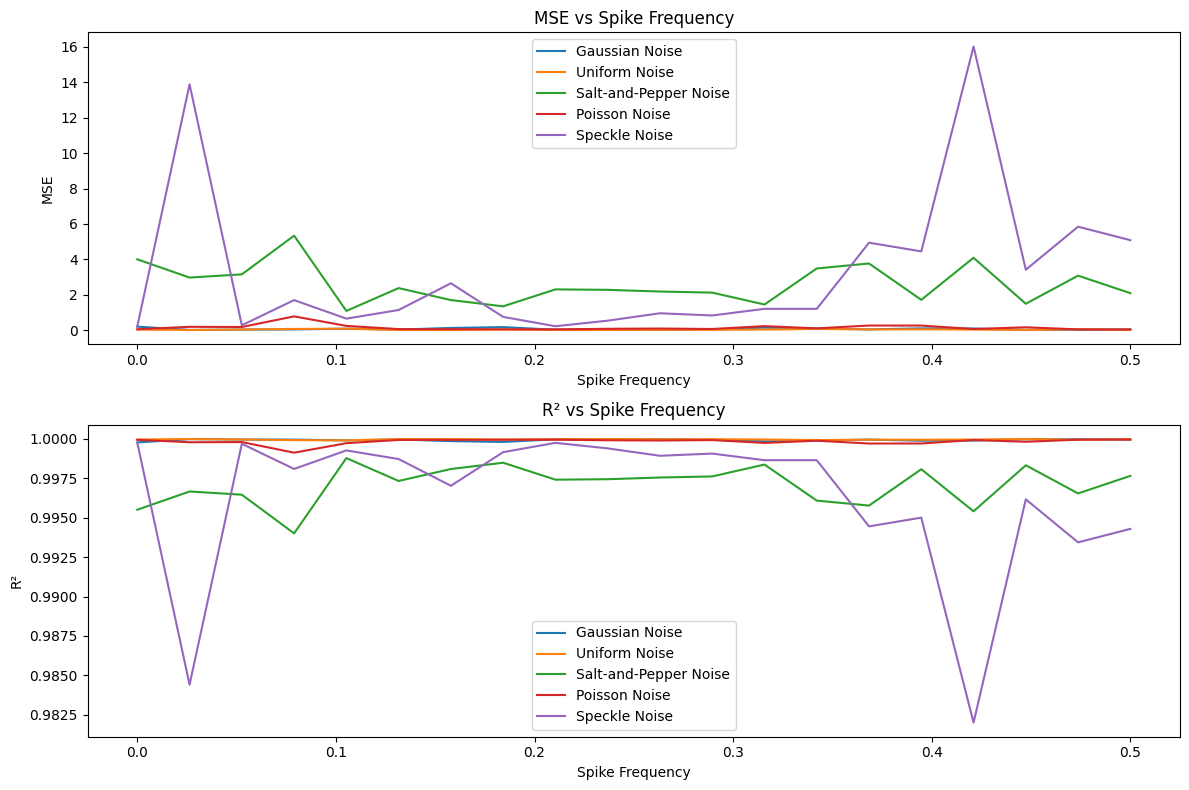

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples, spike_freq, spike_magnitude):
    x = np.linspace(0, 10, n_samples)
    y_true = x**2

    # Generate spikes
    spikes = np.zeros(n_samples)
    n_spikes = int(spike_freq * n_samples)
    spike_indices = np.random.choice(n_samples, n_spikes, replace=False)
    spikes[spike_indices] = spike_magnitude * (2 * np.random.rand(n_spikes) - 1)

    y_noisy = y_true + spikes

    return x, y_true, y_noisy

def add_gaussian_noise(y, std_dev):
    return y + np.random.normal(0, std_dev, y.shape)

def add_uniform_noise(y, low, high):
    return y + np.random.uniform(low, high, y.shape)

def add_salt_and_pepper_noise(y, amount, salt_vs_pepper=0.5):
    noisy_y = y.copy()
    n_salt = int(np.ceil(amount * y.size * salt_vs_pepper))
    n_pepper = int(np.ceil(amount * y.size * (1.0 - salt_vs_pepper)))

    # Salt noise (max value)
    salt_indices = np.random.choice(np.arange(y.size), n_salt, replace=False)
    noisy_y.flat[salt_indices] = noisy_y.max()

    # Pepper noise (min value)
    pepper_indices = np.random.choice(np.arange(y.size), n_pepper, replace=False)
    noisy_y.flat[pepper_indices] = noisy_y.min()

    return noisy_y

def add_poisson_noise(y):
    y_shifted = y - y.min()  # Shift data to be non-negative
    noisy_y = np.random.poisson(y_shifted)
    return noisy_y + y.min()  # Shift back to original range

def add_speckle_noise(y, std_dev):
    return y + y * np.random.normal(0, std_dev, y.shape)

class LinearRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.weights = None

    def fit(self, X, y):
        X_aug = np.column_stack([X**i for i in range(1, self.degree + 1)])
        self.weights = np.linalg.pinv(X_aug).dot(y)

    def predict(self, X):
        X_aug = np.column_stack([X**i for i in range(1, self.degree + 1)])
        return X_aug.dot(self.weights)

def evaluate_model(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    r2 = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
    return mse, r2

# Different types of noise to add
noise_functions = {
    'Gaussian Noise': lambda y: add_gaussian_noise(y, std_dev=5),
    'Uniform Noise': lambda y: add_uniform_noise(y, low=-5, high=5),
    'Salt-and-Pepper Noise': lambda y: add_salt_and_pepper_noise(y, amount=0.05),
    'Poisson Noise': add_poisson_noise,
    'Speckle Noise': lambda y: add_speckle_noise(y, std_dev=0.5)
}

plt.figure(figsize=(12, 8))

for noise_name, noise_func in noise_functions.items():
    mse_list = []
    r2_list = []
    spike_frequencies = np.linspace(0, 0.5, 20)  # Adjust spike frequencies as needed

    for freq in spike_frequencies:
        x, y_true, y_noisy = generate_data(1000, freq, 5)
        y_noisy = noise_func(y_noisy)  # Apply the noise function

        model = LinearRegression(degree=2)
        X = np.column_stack([x**i for i in range(1, 3)])  # Polynomial features
        model.fit(X, y_noisy)
        y_pred = model.predict(X)

        mse, r2 = evaluate_model(y_true, y_pred)
        mse_list.append(mse)
        r2_list.append(r2)

    # Plot MSE and R² for this noise type
    plt.subplot(2, 1, 1)
    plt.plot(spike_frequencies, mse_list, label=f'{noise_name}')
    plt.title('MSE vs Spike Frequency')
    plt.xlabel('Spike Frequency')
    plt.ylabel('MSE')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(spike_frequencies, r2_list, label=f'{noise_name}')
    plt.title('R² vs Spike Frequency')
    plt.xlabel('Spike Frequency')
    plt.ylabel('R²')
    plt.legend()

plt.tight_layout()
plt.show()


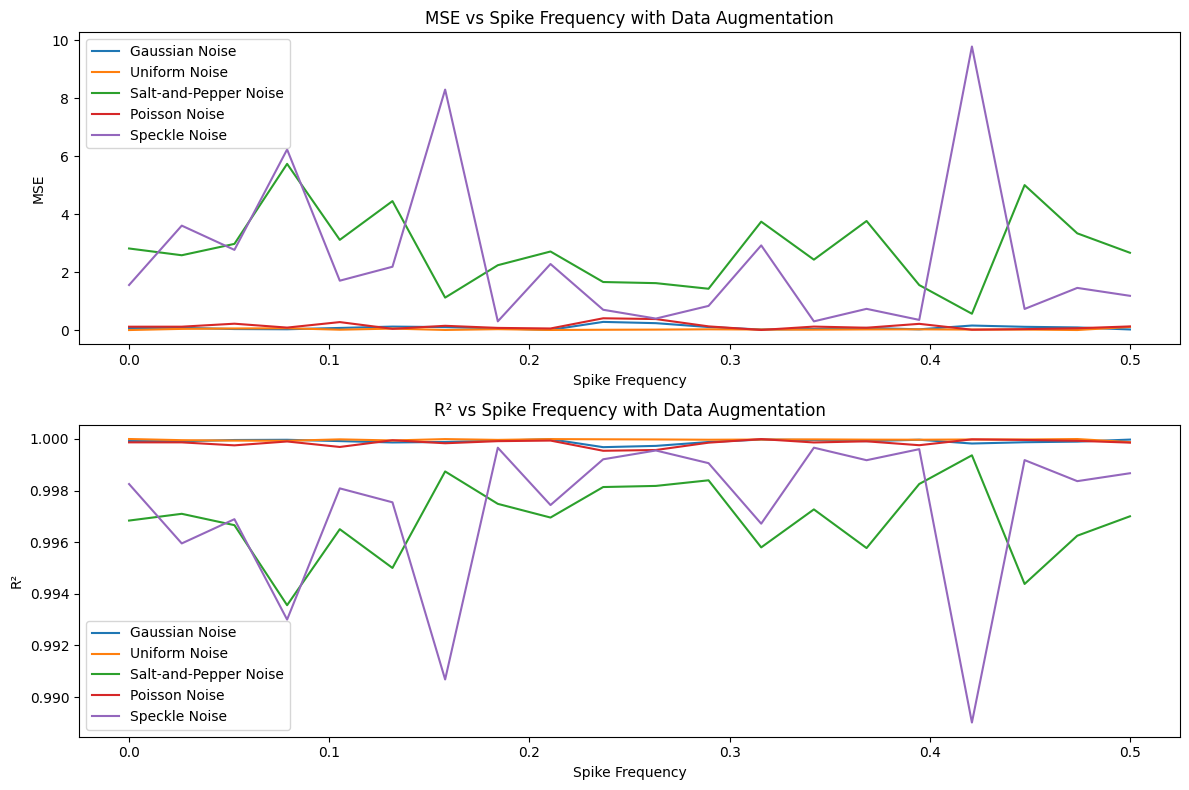

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples, spike_freq, spike_magnitude):
    x = np.linspace(0, 10, n_samples)
    y_true = x**2

    # Generate spikes
    spikes = np.zeros(n_samples)
    n_spikes = int(spike_freq * n_samples)
    spike_indices = np.random.choice(n_samples, n_spikes, replace=False)
    spikes[spike_indices] = spike_magnitude * (2 * np.random.rand(n_spikes) - 1)

    y_noisy = y_true + spikes

    return x, y_true, y_noisy

def add_gaussian_noise(y, std_dev):
    return y + np.random.normal(0, std_dev, y.shape)

def add_uniform_noise(y, low, high):
    return y + np.random.uniform(low, high, y.shape)

def add_salt_and_pepper_noise(y, amount, salt_vs_pepper=0.5):
    noisy_y = y.copy()
    n_salt = int(np.ceil(amount * y.size * salt_vs_pepper))
    n_pepper = int(np.ceil(amount * y.size * (1.0 - salt_vs_pepper)))

    # Salt noise (max value)
    salt_indices = np.random.choice(np.arange(y.size), n_salt, replace=False)
    noisy_y.flat[salt_indices] = noisy_y.max()

    # Pepper noise (min value)
    pepper_indices = np.random.choice(np.arange(y.size), n_pepper, replace=False)
    noisy_y.flat[pepper_indices] = noisy_y.min()

    return noisy_y

def add_poisson_noise(y):
    y_shifted = y - y.min()  # Shift data to be non-negative
    noisy_y = np.random.poisson(y_shifted)
    return noisy_y + y.min()  # Shift back to original range

def add_speckle_noise(y, std_dev):
    return y + y * np.random.normal(0, std_dev, y.shape)

class LinearRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.weights = None

    def fit(self, X, y):
        X_aug = np.column_stack([X**i for i in range(1, self.degree + 1)])
        self.weights = np.linalg.pinv(X_aug).dot(y)

    def predict(self, X):
        X_aug = np.column_stack([X**i for i in range(1, self.degree + 1)])
        return X_aug.dot(self.weights)

def evaluate_model(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    r2 = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
    return mse, r2

# Different types of noise to add
noise_functions = {
    'Gaussian Noise': lambda y: add_gaussian_noise(y, std_dev=5),
    'Uniform Noise': lambda y: add_uniform_noise(y, low=-5, high=5),
    'Salt-and-Pepper Noise': lambda y: add_salt_and_pepper_noise(y, amount=0.05),
    'Poisson Noise': add_poisson_noise,
    'Speckle Noise': lambda y: add_speckle_noise(y, std_dev=0.5)
}

# Generating synthetic datasets with different types of noise
plt.figure(figsize=(12, 8))

for noise_name, noise_func in noise_functions.items():
    mse_list = []
    r2_list = []
    spike_frequencies = np.linspace(0, 0.5, 20)  # Adjust spike frequencies as needed

    for freq in spike_frequencies:
        x, y_true, y_noisy = generate_data(1000, freq, 5)
        y_noisy_augmented = noise_func(y_noisy)  # Apply the noise function

        model = LinearRegression(degree=2)
        X = np.column_stack([x**i for i in range(1, 3)])  # Polynomial features
        model.fit(X, y_noisy_augmented)
        y_pred = model.predict(X)

        mse, r2 = evaluate_model(y_true, y_pred)
        mse_list.append(mse)
        r2_list.append(r2)

    # Plot MSE and R² for this noise type
    plt.subplot(2, 1, 1)
    plt.plot(spike_frequencies, mse_list, label=f'{noise_name}')
    plt.title('MSE vs Spike Frequency with Data Augmentation')
    plt.xlabel('Spike Frequency')
    plt.ylabel('MSE')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(spike_frequencies, r2_list, label=f'{noise_name}')
    plt.title('R² vs Spike Frequency with Data Augmentation')
    plt.xlabel('Spike Frequency')
    plt.ylabel('R²')
    plt.legend()

plt.tight_layout()
plt.show()


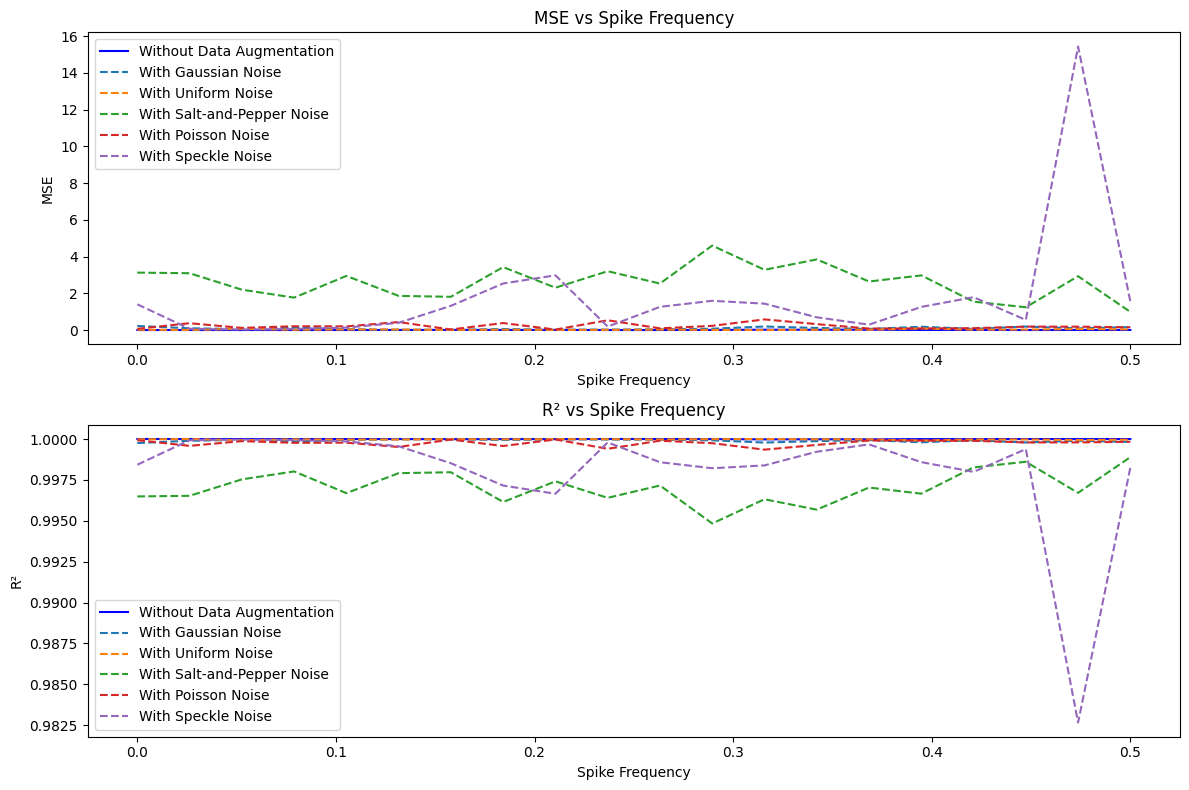

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with spikes
def generate_data(n_samples, spike_freq, spike_magnitude):
    x = np.linspace(0, 10, n_samples)
    y_true = x**2

    # Generate spikes
    spikes = np.zeros(n_samples)
    n_spikes = int(spike_freq * n_samples)
    spike_indices = np.random.choice(n_samples, n_spikes, replace=False)
    spikes[spike_indices] = spike_magnitude * (2 * np.random.rand(n_spikes) - 1)

    y_noisy = y_true + spikes

    return x, y_true, y_noisy

# Define different types of noise
def add_gaussian_noise(y, std_dev):
    return y + np.random.normal(0, std_dev, y.shape)

def add_uniform_noise(y, low, high):
    return y + np.random.uniform(low, high, y.shape)

def add_salt_and_pepper_noise(y, amount, salt_vs_pepper=0.5):
    noisy_y = y.copy()
    n_salt = int(np.ceil(amount * y.size * salt_vs_pepper))
    n_pepper = int(np.ceil(amount * y.size * (1.0 - salt_vs_pepper)))

    # Salt noise (max value)
    salt_indices = np.random.choice(np.arange(y.size), n_salt, replace=False)
    noisy_y.flat[salt_indices] = noisy_y.max()

    # Pepper noise (min value)
    pepper_indices = np.random.choice(np.arange(y.size), n_pepper, replace=False)
    noisy_y.flat[pepper_indices] = noisy_y.min()

    return noisy_y

def add_poisson_noise(y):
    y_shifted = y - y.min()  # Shift data to be non-negative
    noisy_y = np.random.poisson(y_shifted)
    return noisy_y + y.min()  # Shift back to original range

def add_speckle_noise(y, std_dev):
    return y + y * np.random.normal(0, std_dev, y.shape)

# Simple polynomial regression model
class LinearRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.weights = None

    def fit(self, X, y):
        X_aug = np.column_stack([X**i for i in range(1, self.degree + 1)])
        self.weights = np.linalg.pinv(X_aug).dot(y)

    def predict(self, X):
        X_aug = np.column_stack([X**i for i in range(1, self.degree + 1)])
        return X_aug.dot(self.weights)

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    r2 = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
    return mse, r2

# Spike frequencies to test
spike_frequencies = np.linspace(0, 0.5, 20)

# Noise functions for data augmentation
noise_functions = {
    'Gaussian Noise': lambda y: add_gaussian_noise(y, std_dev=5),
    'Uniform Noise': lambda y: add_uniform_noise(y, low=-5, high=5),
    'Salt-and-Pepper Noise': lambda y: add_salt_and_pepper_noise(y, amount=0.05),
    'Poisson Noise': add_poisson_noise,
    'Speckle Noise': lambda y: add_speckle_noise(y, std_dev=0.5)
}

# Without Data Augmentation
mse_without_aug = []
r2_without_aug = []

for freq in spike_frequencies:
    x, y_true, y_noisy = generate_data(1000, freq, 5)

    model = LinearRegression(degree=2)
    X = np.column_stack([x**i for i in range(1, 3)])  # Polynomial features
    model.fit(X, y_noisy)
    y_pred = model.predict(X)

    mse, r2 = evaluate_model(y_true, y_pred)
    mse_without_aug.append(mse)
    r2_without_aug.append(r2)

# With Data Augmentation
mse_with_aug = {name: [] for name in noise_functions.keys()}
r2_with_aug = {name: [] for name in noise_functions.keys()}

for noise_name, noise_func in noise_functions.items():
    for freq in spike_frequencies:
        x, y_true, y_noisy = generate_data(1000, freq, 5)
        y_noisy_augmented = noise_func(y_noisy)  # Apply the noise function

        model = LinearRegression(degree=2)
        X = np.column_stack([x**i for i in range(1, 3)])  # Polynomial features
        model.fit(X, y_noisy_augmented)
        y_pred = model.predict(X)

        mse, r2 = evaluate_model(y_true, y_pred)
        mse_with_aug[noise_name].append(mse)
        r2_with_aug[noise_name].append(r2)

# Plotting the results
plt.figure(figsize=(12, 8))

# MSE Plot
plt.subplot(2, 1, 1)
plt.plot(spike_frequencies, mse_without_aug, 'b-', label='Without Data Augmentation')
for noise_name, mse_values in mse_with_aug.items():
    plt.plot(spike_frequencies, mse_values, '--', label=f'With {noise_name}')
plt.title('MSE vs Spike Frequency')
plt.xlabel('Spike Frequency')
plt.ylabel('MSE')
plt.legend()

# R² Plot
plt.subplot(2, 1, 2)
plt.plot(spike_frequencies, r2_without_aug, 'b-', label='Without Data Augmentation')
for noise_name, r2_values in r2_with_aug.items():
    plt.plot(spike_frequencies, r2_values, '--', label=f'With {noise_name}')
plt.title('R² vs Spike Frequency')
plt.xlabel('Spike Frequency')
plt.ylabel('R²')
plt.legend()

plt.tight_layout()
plt.show()


Specific Observations:

Gaussian, Uniform, Poisson, and Speckle Noise: These types of noise in the augmented data helped the model maintain stable performance. The MSE remained low and R² scores high, suggesting that the model could generalize better across noisy conditions.

Salt-and-Pepper Noise: While data augmentation with Salt-and-Pepper noise introduced variability, the model still performed better than without augmentation, except in some high spike frequency scenarios where the MSE increased and R² decreased.


Overall Performance:

With Data Augmentation: The model generally performed better when data augmentation was applied, particularly with Gaussian, Uniform, Poisson, and Speckle noise. This is evident from the consistently low MSE and high R² scores across different spike frequencies, indicating that the model was more robust to variations in the data and handled noise more effectively.

Without Data Augmentation: The model showed higher variability in MSE and a slight decrease in R² at higher spike frequencies, indicating that it struggled more to maintain performance as noise levels increased.


<h5>Different types of Noises:</h5>

1. Gaussian Noise
Description: Adds random values drawn from a Gaussian (normal) distribution, which is characterized by a bell-shaped curve. The noise is centered around a mean value (usually zero) and spreads out according to a specified standard deviation.
Mathematical Intuition:
Model:
𝑁
∼
𝑁
(
𝜇
,
𝜎
2
)
N∼N(μ,σ
2
 )
𝑁
(
𝜇
,
𝜎
2
)
N(μ,σ
2
 ) represents a Gaussian distribution with mean
𝜇
μ and variance
𝜎
2
σ
2
 .
Effect: Results in data points that fluctuate around the original value with a spread determined by the standard deviation. This spread is Gaussian, so most of the noise values are close to the mean, with fewer values farther away.
2. Uniform Noise
  Description: Adds random values that are evenly distributed across a specified range. Each value within this range is equally likely.
Mathematical Intuition:
Model:
𝑁
∼
Uniform
(
𝑎
,
𝑏
)
N∼Uniform(a,b)
Uniform
(
𝑎
,
𝑏
)
Uniform(a,b) represents a uniform distribution over the interval
[
𝑎
,
𝑏
]
[a,b].
Effect: Results in a consistent perturbation range, where every possible value within
[
𝑎
,
𝑏
]
[a,b] has an equal chance of occurring. This creates uniform variability across the data.
3. Salt and Pepper Noise
Description: Introduces random occurrences of extreme values, with some data points being set to the maximum (salt) and others to the minimum (pepper) values. This type of noise simulates sporadic disturbances.
Mathematical Intuition:
Model: For each data point
𝑥
𝑖
x
i
​
 , with probability
𝑝
p, set
𝑥
𝑖
x
i
​
  to maximum or minimum value. Otherwise, keep
𝑥
𝑖
x
i
​
  unchanged.
Effect: Creates random, high-intensity disturbances that appear as bright and dark spots in images. The noise probability
𝑝
p controls the frequency of these disturbances.
4. Speckle Noise
Description: Adds noise that is proportional to the signal value, creating a grainy or mottled appearance. This noise is multiplicative, meaning the noise level varies with the magnitude of the signal.
Mathematical Intuition:
Model:
𝑁
=
𝑆
⋅
𝜖
N=S⋅ϵ
𝑆
S represents the original signal, and
𝜖
∼
𝑁
(
0
,
𝜎
2
)
ϵ∼N(0,σ
2
 ) is Gaussian noise.
Effect: The noise is scaled by the signal, so areas with higher signal values have more noise. This creates a grainy effect where noise intensity is related to the signal strength.
5. Poisson Noise
Description: Adds noise based on a Poisson distribution, where the noise level is related to the signal intensity. The variance of the noise is equal to the mean, so higher signals lead to higher noise levels.
Mathematical Intuition:
Model:
𝑁
∼
Poisson
(
𝜆
)
N∼Poisson(λ)
The Poisson distribution with parameter
𝜆
λ describes the noise, where
𝜆
λ is the mean and variance.
Effect: Noise level increases with signal intensity. This models count-based processes, where the number of events or counts (like photons) determines the noise level.
